In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

## Cat Part

In [25]:
train_cat = "cat2dog_resized/train_cats"
train_cat_list = []
for image in (os.listdir(train_cat)): 
    path = os.path.join(train_cat, image)
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_cat_list.append(img)
train_cat_np = np.array(train_cat_list)

Text(0.5, 1.0, 'Dog Test')

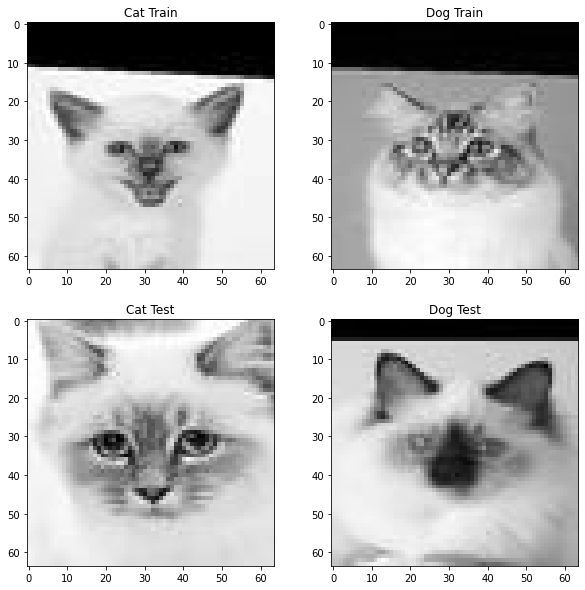

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_cat_np[0], cmap='gray')
ax[0, 0].set_title("Cat Train")
ax[0, 1].imshow(train_cat_np[1], cmap='gray')
ax[0, 1].set_title("Dog Train")
ax[1, 0].imshow(train_cat_np[2], cmap='gray')
ax[1, 0].set_title("Cat Test")
ax[1, 1].imshow(train_cat_np[3], cmap='gray')
ax[1, 1].set_title("Dog Test")

In [27]:
train_cat_np_matrix = train_cat_np.reshape(train_cat_np.shape[0], train_cat_np.shape[1]*train_cat_np.shape[2])
mean_train_cat = np.mean(train_cat_np_matrix, axis=0)
centered_train_cat = train_cat_np_matrix - mean_train_cat

In [28]:
U_CAT_TRAIN, S_CAT_TRAIN, V_CAT_TRAIN = np.linalg.svd(centered_train_cat, full_matrices=False)

In [29]:
n_comp = 4096
C_CAT_TRAIN = V_CAT_TRAIN[:n_comp]
eigen_cats_train = C_CAT_TRAIN.reshape((n_comp, 64, 64))

In [30]:
percent_eigenvalues = [eigenvalue/np.sum(S_CAT_TRAIN**2) for eigenvalue in S_CAT_TRAIN**2]
count = 0
total_var = 0
var_values = []
for eigenvalue in percent_eigenvalues:
    total_var += eigenvalue
    count += 1
    var_values.append(total_var)
    if total_var > 0.95:
        break

print("Count:", count, "\nTotal Variance:", total_var)

Count: 381 
Total Variance: 0.9500085306825041


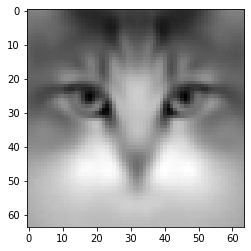

In [31]:
plt.figure()
plt.imshow(mean_train_cat.reshape(64, 64), cmap='gray')

Text(0.5, 1.0, 'Dog Test')

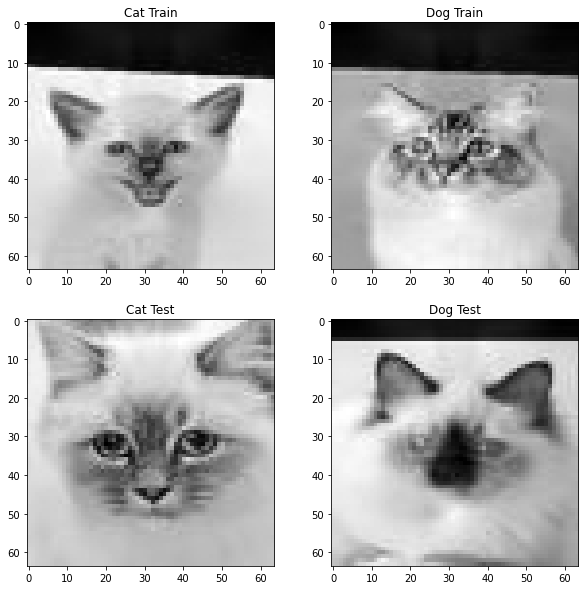

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_cat_np[0]-mean_train_cat.reshape(64,64), cmap='gray')
ax[0, 0].set_title("Cat Train")
ax[0, 1].imshow(train_cat_np[1]-mean_train_cat.reshape(64,64), cmap='gray')
ax[0, 1].set_title("Dog Train")
ax[1, 0].imshow(train_cat_np[2]-mean_train_cat.reshape(64,64), cmap='gray')
ax[1, 0].set_title("Cat Test")
ax[1, 1].imshow(train_cat_np[3]-mean_train_cat.reshape(64,64), cmap='gray')
ax[1, 1].set_title("Dog Test")

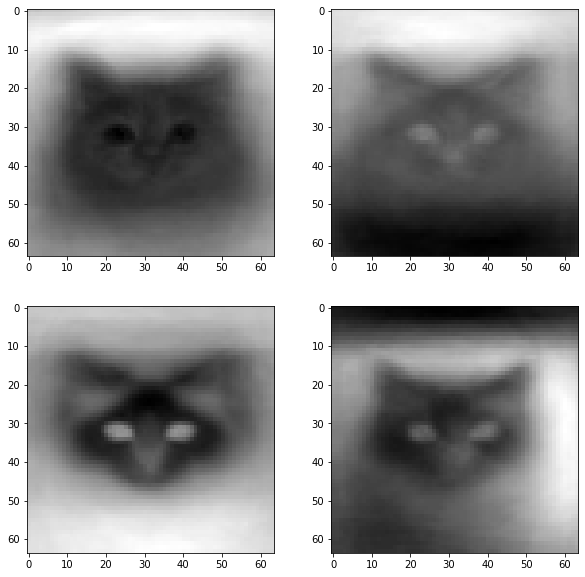

In [14]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(eigen_cats_train[0], cmap='gray')
ax[0, 1].imshow(eigen_cats_train[1], cmap='gray')
ax[1, 0].imshow(eigen_cats_train[2], cmap='gray')
ax[1, 1].imshow(eigen_cats_train[3], cmap='gray')

In [93]:
def is_a_cat(imagem, n_componentes):
    img3 = imagem.reshape((4096,))
    U_ = U_CAT_TRAIN[:n_componentes]
    p = np.dot(np.identity(n_componentes) - np.dot(U_,U_.T), img3 - mean_train_cat)
    d = np.linalg.norm(p)
    lim = 4000
    return d < lim, d

(True, 3232.4021480326596)


([], [])

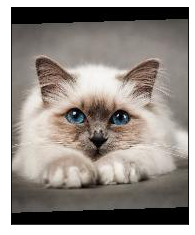

In [128]:
imagem = 'cat2dog/testA/14.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(is_a_cat(img3, n_comp))
plt.imshow(plt.imread(imagem),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

## Dog Part

In [99]:
train_dog = "cat2dog_resized/train_dogs"
train_dog_list = []
for image in (os.listdir(train_dog)):
    path = os.path.join(train_dog, image)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_dog_list.append(img)
train_dog_np = np.array(train_dog_list)

Text(0.5, 1.0, 'Dog Test')

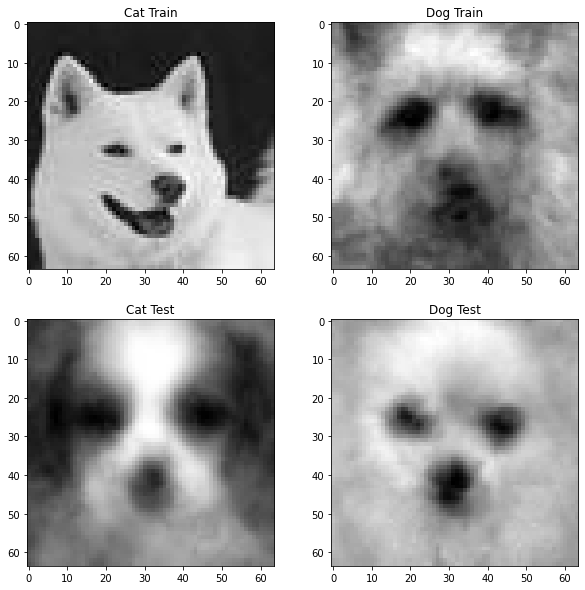

In [103]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_dog_np[0], cmap='gray')
ax[0, 0].set_title("Cat Train")
ax[0, 1].imshow(train_dog_np[1], cmap='gray')
ax[0, 1].set_title("Dog Train")
ax[1, 0].imshow(train_dog_np[201], cmap='gray')
ax[1, 0].set_title("Cat Test")
ax[1, 1].imshow(train_dog_np[300], cmap='gray')
ax[1, 1].set_title("Dog Test")

In [104]:
train_dog_np_matrix = train_dog_np.reshape(train_dog_np.shape[0], train_dog_np.shape[1]*train_dog_np.shape[2])
mean_train_dog = np.mean(train_dog_np_matrix, axis=0)
centered_train_dog = train_dog_np_matrix - mean_train_dog

In [106]:
U_DOG_TRAIN, S_DOG_TRAIN, V_DOG_TRAIN = np.linalg.svd(centered_train_dog, full_matrices=False)

In [116]:
n_comp = 4096
C_DOG_TRAIN = V_DOG_TRAIN[:n_comp]
eigen_dogs_train = C_DOG_TRAIN.reshape((n_comp, 64, 64))

In [110]:
percent_eigenvalues = [eigenvalue/np.sum(S_DOG_TRAIN**2) for eigenvalue in S_DOG_TRAIN**2]
count = 0
total_var = 0
var_values = []
for eigenvalue in percent_eigenvalues:
    total_var += eigenvalue
    count += 1
    var_values.append(total_var)
    if total_var > 0.95:
        break

print("Count:", count, "\nTotal Variance:", total_var)

Count: 48 
Total Variance: 0.9500780361908324


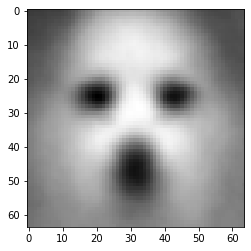

In [112]:
plt.figure()
plt.imshow(mean_train_dog.reshape(64, 64), cmap='gray')

Text(0.5, 1.0, 'Dog Test')

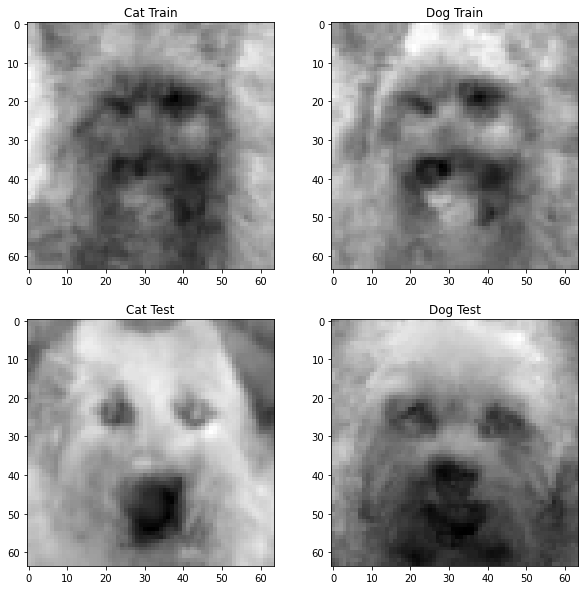

In [114]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_dog_np[1]-mean_train_dog.reshape(64,64), cmap='gray')
ax[0, 0].set_title("Cat Train")
ax[0, 1].imshow(train_dog_np[10]-mean_train_dog.reshape(64,64), cmap='gray')
ax[0, 1].set_title("Dog Train")
ax[1, 0].imshow(train_dog_np[255]-mean_train_dog.reshape(64,64), cmap='gray')
ax[1, 0].set_title("Cat Test")
ax[1, 1].imshow(train_dog_np[988]-mean_train_dog.reshape(64,64), cmap='gray')
ax[1, 1].set_title("Dog Test")

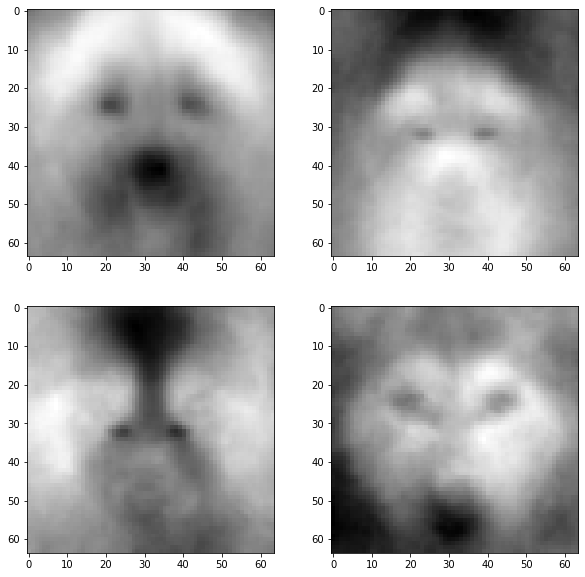

In [117]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(eigen_dogs_train[0], cmap='gray')
ax[0, 1].imshow(eigen_dogs_train[1], cmap='gray')
ax[1, 0].imshow(eigen_dogs_train[2], cmap='gray')
ax[1, 1].imshow(eigen_dogs_train[3], cmap='gray')

In [118]:
def is_a_dog(imagem, n_componentes):
    img3 = imagem.reshape((4096,))
    U_ = U_DOG_TRAIN[:n_componentes]
    p = np.dot(np.identity(n_componentes) - np.dot(U_,U_.T), img3 - mean_train_dog)
    d = np.linalg.norm(p)
    lim = 4000
    return d < lim, d

(True, 3553.864618369274)


([], [])

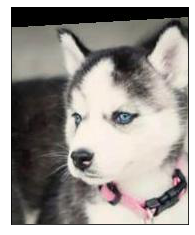

In [129]:
imagem = 'cat2dog/testB/5.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(is_a_dog(img3, n_comp))
plt.imshow(plt.imread(imagem),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

## Finish

In [153]:
def cat_or_dog(image):
    is_dog = is_a_dog(image, n_comp)
    is_cat = is_a_cat(image, n_comp)
    if is_dog[1] < is_cat[1] and is_dog[0] == True:
        return "Dog", is_dog[1], is_cat[1]
    elif is_dog[1] > is_cat[1] and is_cat[0] == True:
        return "Cat", is_cat[1], is_dog[1]
    else:
        return "None", is_cat[1], is_dog[1]

In [154]:
imagem = 'test/arvore.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))

('None', 6090.986519451908, 5309.028780832869)


In [155]:
test_cat = "cat2dog/testA"
accuracy_test = []
for image in (os.listdir(test_cat)): 
    img = plt.imread(imagem)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
    img3 = img2.reshape((4096,))
    accuracy_test.append(cat_or_dog(img3)[0] == "Cat")